In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import seaborn as sns
import annoy
import pandas as pd

%load_ext autoreload
%autoreload 2
from ann_utils import ANN

In [2]:
# our selected best model
model = "2021-02-26_07:34:56.977606" # ResNet sigmoid activation + 3-layer classifier + larger classifier weight

In [3]:
embedding_path = f"models/{model}/fma_embeddings.npy"
label_path = f"models/{model}/fma_labels.npy"
filename_path = "data/fma_small_wav/filenames.npy"

In [4]:
ann = ANN(embedding_path, label_path, filename_path, -1)
ann.supervised_evaluation(double_vote=False)

sub-track-classification acc: 62.0% 
top_2 sub-track-classification acc: 85.0%


working on TSNE. Might take a while
Oof. Done with TSNE.


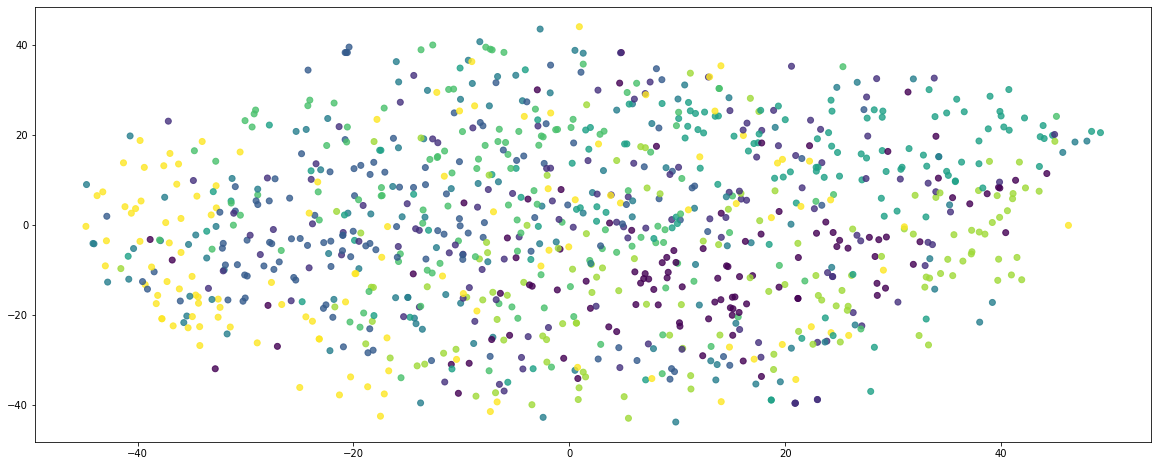

In [5]:
# this takes a very long time to compute (even longer than the evaluation)
ann.plot_tsne(size=1000) # how many random points you want to fit_transform 

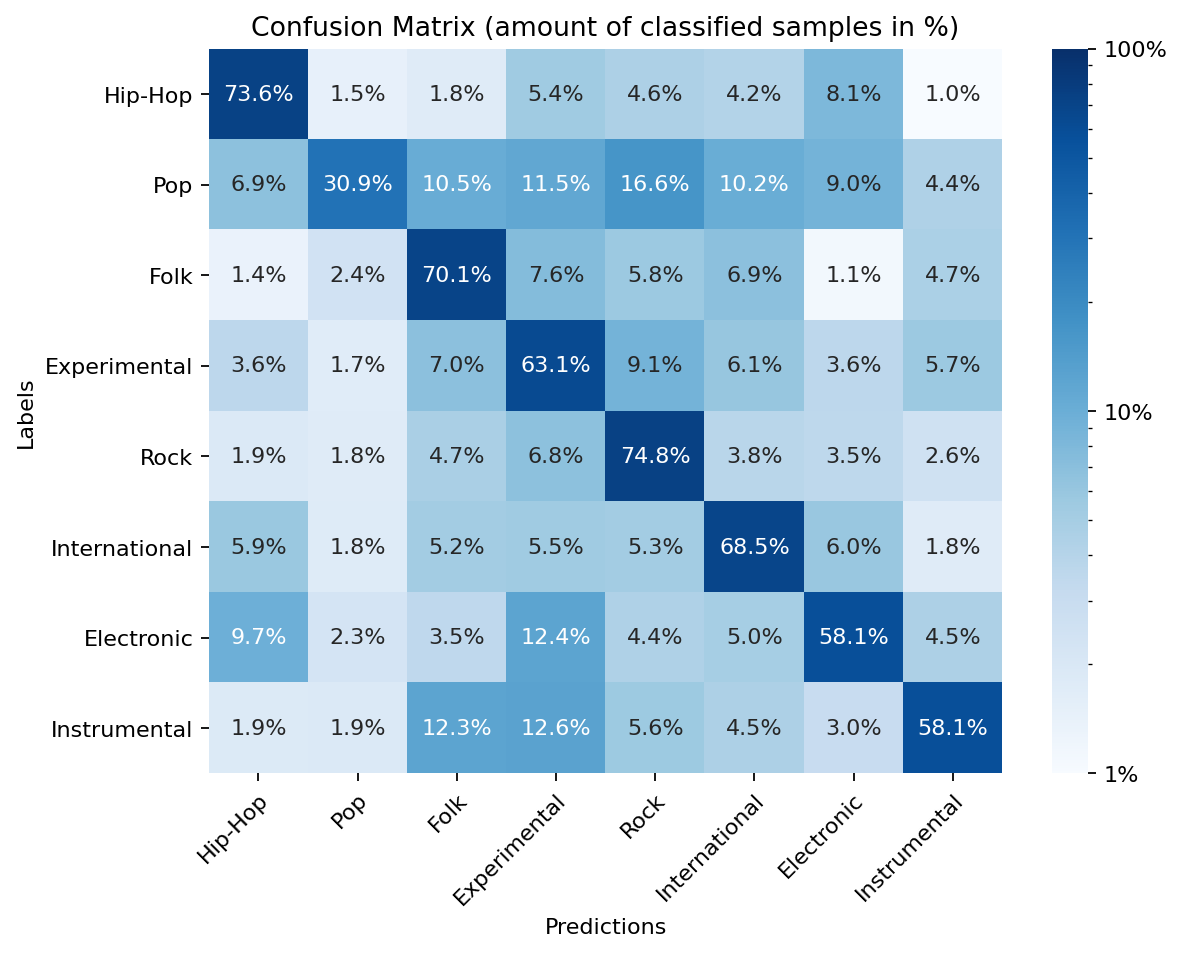

In [6]:
c_mat = ann.confusion_matrix

fig, ax = plt.subplots(figsize=(8, 6), dpi=160)
ax = sns.heatmap(c_mat/np.sum(c_mat, axis=1)[:,np.newaxis], ax = ax,
                 fmt='.1%', annot=True, cmap='Blues', norm=LogNorm(1e-2,1),
                xticklabels=ann.genre_names, yticklabels=ann.genre_names)

ax.set_ylabel("Labels")
ax.set_xlabel("Predictions")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Confusion Matrix (amount of classified samples in %)")

cbar = ax.collections[-1].colorbar  # Add a colorbar to the figure based on the image
cbar.set_ticks([0.01,0.1,1.0])
cbar.set_ticklabels(["1%","10%","100%"]);

In [7]:
report = ann.classification_report
df = pd.DataFrame.from_dict(report).transpose()
df.head(df.shape[0]-3)

,precision,recall,f1-score,support
Hip-Hop,0.700985,0.735507,0.717831,9970.0
Pop,0.697990,0.309000,0.428363,10000.0
Folk,0.609739,0.701200,0.652279,10000.0
Experimental,0.504843,0.631231,0.561007,9990.0
Rock,0.592798,0.748148,0.661474,9990.0
International,0.626737,0.685400,0.654757,10000.0
Electronic,0.628612,0.581481,0.604129,9990.0
Instrumental,0.702333,0.581191,0.636045,9995.0


In [8]:
df.tail(3)

,precision,recall,f1-score,support
accuracy,0.621593,0.621593,0.621593,0.621593
macro avg,0.633005,0.621645,0.614486,79935.000000
weighted avg,0.632996,0.621593,0.614448,79935.000000
